<a href="https://colab.research.google.com/github/abh2050/Codes-/blob/master/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving Athletes.xlsx to Athletes.xlsx
Saving Coaches.xlsx to Coaches.xlsx
Saving EntriesGender.xlsx to EntriesGender.xlsx
Saving Medals.xlsx to Medals.xlsx
Saving Teams.xlsx to Teams.xlsx


In [3]:
medal_count = pd.read_excel("Medals.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
medal_count


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


Estimates of locations 

In [5]:
from operator import methodcaller
#mean
medal_count["Total"].mean()

11.612903225806452

In [7]:
import numpy as np
np.average(medal_count["Total"],weights= medal_count["Gold"])

46.832352941176474

In [8]:
#Trimmed mean
from scipy.stats import trim_mean
trim_mean(medal_count["Gold"],0.1)

1.96

In [12]:
#Median
medal_count["Total"].median()

4.0

In [22]:
from pandas.core.reshape.tile import cut
from numpy.ma.core import cumsum
# Weighted Median

def weighted_median(df,median_col,weight_col):
  df_sorted = df.sort_values(median_col)
  cumsum=df_sorted[weight_col].cumsum()
  cutoff = df_sorted[weight_col].sum() /2
  return df_sorted[cumsum>= cutoff][median_col].iloc[0]

weighted_median(medal_count,"Total","Gold")

40

In [23]:
q3 = np.percentile(medal_count["Total"],75)
q3

11.0

In [24]:
medal_count.describe()


,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimate of Variability (Dispersion Metrics)

In [25]:
#variance

from statistics import variance
variance(medal_count["Gold"])

49.315100514259

In [26]:
#Standard Deviation

from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671376

In [27]:
# Mean absolute Deviation 
from numpy import mean, absolute
mean(absolute(medal_count["Gold"]-mean(medal_count["Gold"])))

4.0048560527228485

In [28]:
#Median absolute Deviation
from numpy import median, absolute
median(absolute(medal_count["Gold"]-median(medal_count["Gold"])))

1.0

In [29]:
#Interquartile range
q3 ,q1 = np.percentile(medal_count["Gold"],[75,25])
iqr = q3 -q1
iqr


3.0

## Exploring the Data Distribution 
# Box Plot 

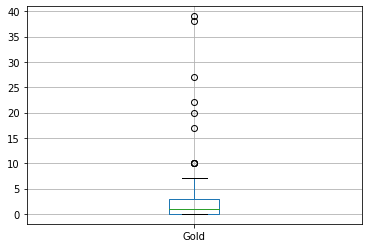

In [33]:
medal_count.boxplot(column="Gold",by=None,ax= None)


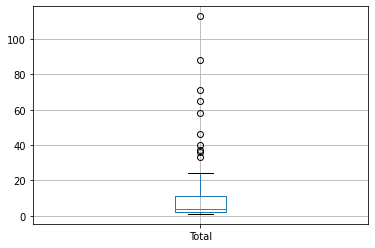

In [32]:
medal_count.boxplot(column="Total",by=None,ax= None)

In [36]:
#Frequency Table
frequency_table = medal_count.copy()
frequency_table["freq"]=pd.cut(medal_count["Gold"],10)
frequency_table.groupby('freq')["Rank"].count().reset_index()

,freq,Rank
0,"(-0.039, 3.9]",72
1,"(3.9, 7.8]",11
2,"(7.8, 11.7]",4
3,"(11.7, 15.6]",0
4,"(15.6, 19.5]",1
5,"(19.5, 23.4]",2
6,"(23.4, 27.3]",1
7,"(27.3, 31.2]",0
8,"(31.2, 35.1]",0
9,"(35.1, 39.0]",2


(array([83.,  4.,  3.,  1.,  2.]),
 array([ 0. ,  7.8, 15.6, 23.4, 31.2, 39. ]),
 <a list of 5 Patch objects>)

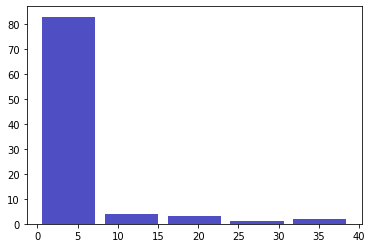

In [40]:
#histogram
import matplotlib.pyplot as plt
plt.hist(x=medal_count["Gold"],bins= 5,color = "#0504aa",alpha=0.7,rwidth= 0.85)

Text(0.5, 0, 'Medal Count (per 100,000')

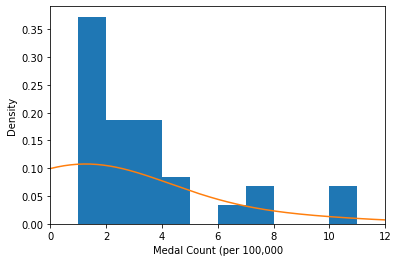

In [48]:
#Density plot

ax = medal_count["Gold"].plot.hist(density = True ,xlim =[0,12],bins=range(1,12))
medal_count["Gold"].plot.density(ax = ax)
ax.set_xlabel("Medal Count (per 100,000")

In [49]:
# Exploring Binary and Categorical Data

medal_count["Gold"].mode()

0    0
dtype: int64

Text(0, 0.5, 'Country')

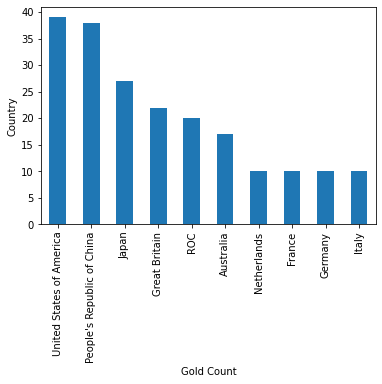

In [50]:
#Barchart
from IPython.core.pylabtools import figsize
ax = medal_count.iloc[:10,:].plot.bar(x="Team/NOC",y ="Gold",legend = False)
ax.set_xlabel("Gold Count")
ax.set_ylabel("Country")

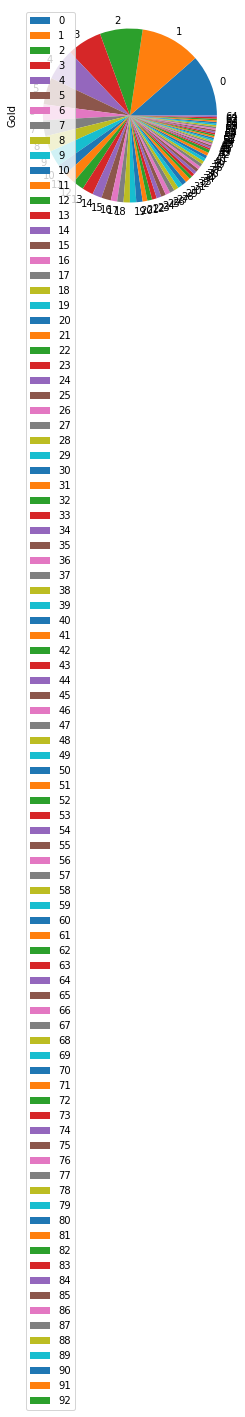

In [51]:
#pie chart
ax= medal_count.plot.pie(y="Gold")

In [52]:
##Corelation 
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


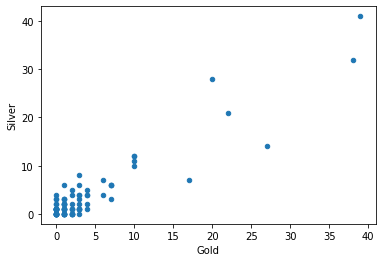

In [53]:
## Corelation Matrix 
medal_count.plot.scatter(x="Gold",y="Silver")

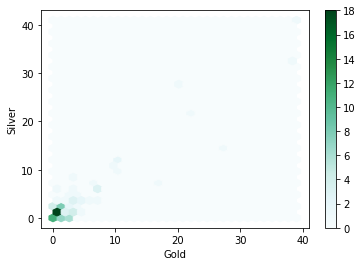

In [54]:
medal_count.plot.hexbin(x="Gold",y="Silver",gridsize=30,sharex=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


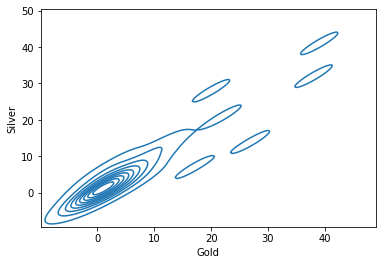

In [55]:
from seaborn.distributions import kdeplot
import seaborn as sns
ax = sns,kdeplot(medal_count["Gold"],medal_count["Silver"])

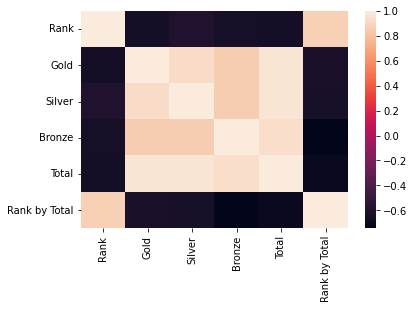

In [56]:
#Heatmap
sns.heatmap(medal_count.corr())

In [60]:
#Contingency Table
crosstab = medal_count.pivot_table(index="Team/NOC",columns="Gold",aggfunc=lambda x:len(x),margins=True)
crosstab.fillna(0)


Bronze                                             \
Gold                          0     1     2     3    4    6    7   10   17   
Team/NOC                                                                     
Argentina                   1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                     1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Australia                   0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  1.0   
Austria                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                  1.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
...                         ...   ...   ...   ...  ...  ...  ...  ...  ...   
Ukraine                     0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
United States of America    0.0   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                  0.0   0.0   0.0   1.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                   0.0   1.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0   
All                        28.0  22.0  11.0  11.0  5.0  2.0  4.0  4.0  1.0   

                               ... Total                                     \
Gold                       20  ...     6    7   10   17   20   22   27   38   
Team/NOC                       ...                                            
Argentina                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Armenia                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Australia                 0.0  ...   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
Austria                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Azerbaijan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                       ...  ...   ...  ...  ...  ...  ...  ...  ...  ...   
Ukraine                   0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
United States of America  0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Uzbekistan                0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Venezuela                 0.0  ...   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
All                       1.0  ...   2.0  4.0  4.0  1.0  1.0  1.0  1.0  1.0   

                                   
Gold                       39 All  
Team/NOC                           
Argentina                 0.0   1  
Armenia                   0.0   1  
Australia                 0.0   1  
Austria                   0.0   1  
Azerbaijan                0.0   1  
...                       ...  ..  
Ukraine                   0.0   1  
United States of America  1.0   1  
Uzbekistan                0.0   1  
Venezuela                 0.0   1  
All                       1.0  93  

[94 rows x 75 columns]

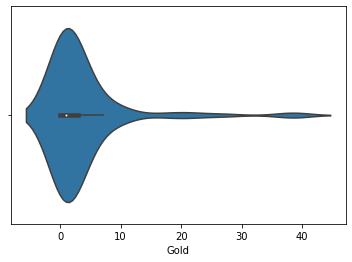

In [61]:
#Violin Plot
sns.violinplot(x=medal_count["Gold"])